<a href="https://colab.research.google.com/github/sanghamitrajohri/Basic-DL-and-Computer-Vision-COLAB-/blob/main/Arrow_direction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
INIT_LR = 1e-3
EPOCHS = 20
BS = 8

In [ ]:
imagePaths = list(paths.list_images("/content/drive/MyDrive/ARROWS"))
data = []
labels = []

In [5]:
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/ARROWS',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['DOWN','LEFT','RIGHT','UP'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_dataset = train_datagen.flow_from_directory('/content/drive/My Drive/ARROWS',
                                               target_size = (200,200),
                                               batch_size = 3,
                                               class_mode = 'categorical')

Found 379 images belonging to 4 classes.
Found 379 images belonging to 4 classes.


In [6]:
train_generator.class_indices

{'DOWN': 0, 'LEFT': 1, 'RIGHT': 2, 'UP': 3}

In [7]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n

In [20]:
history = model.fit(train_generator,
                    steps_per_epoch = 3,
                    epochs = 20,
                    verbose=1,
                    validation_data = validation_dataset
)

Epoch 1/20
3/3 [==============================] - 7s 2s/step - loss: 0.9049 - acc: 0.7033 - val_loss: 0.7475 - val_acc: 0.7388
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: 0.6405 - acc: 0.7500 - val_loss: 0.6256 - val_acc: 0.7652
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.7021 - acc: 0.7500 - val_loss: 0.5183 - val_acc: 0.8232
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.7513 - acc: 0.6875 - val_loss: 0.5954 - val_acc: 0.7916
Epoch 5/20
3/3 [==============================] - 7s 2s/step - loss: 0.5096 - acc: 0.8333 - val_loss: 0.5683 - val_acc: 0.7678
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: 0.5961 - acc: 0.7473 - val_loss: 0.7478 - val_acc: 0.7018
Epoch 7/20
3/3 [==============================] - 7s 2s/step - loss: 0.6607 - acc: 0.7500 - val_loss: 0.5176 - val_acc: 0.7968
Epoch 8/20
3/3 [==============================] - 7s 2s/step - loss: 0.3681 - acc: 0.8958 - val_loss: 0.4090 - 

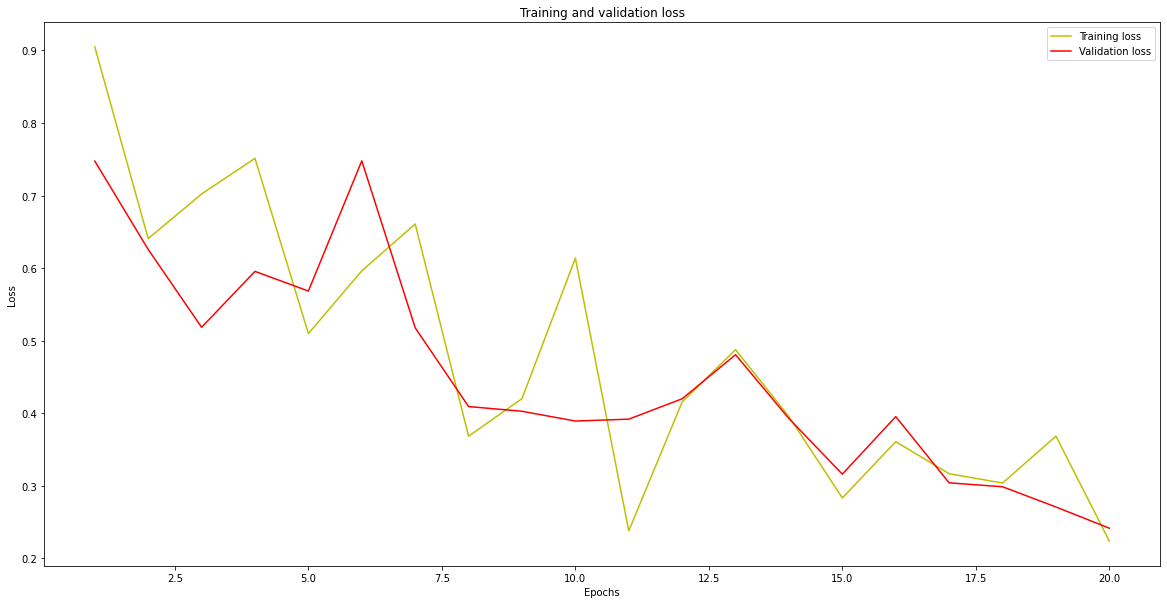

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ARROWS/LEFT/download (11).png', target_size = (200,200))
#test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    print("DOWN")
elif result[0][1] == 1:
    print("LEFT")
elif result[0][2] == 1:
    print("RIGHT")
elif result[0][3] == 1:
    print("UP")

LEFT
